In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
def percentage_MV(df):
    columns= list(df.columns)
    d = {}
    for x in columns:
        d[x]= df[x].isnull().sum()/len(df[x])
    
    missing_values = pd.DataFrame(d, index=['percentage of missing values'])
    return missing_values.transpose()

In [3]:
data = pd.read_csv(r"C:\Users\leube\Downloads\survival_rate_patients.csv")
survival = pd.DataFrame(data)
survival

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


In [4]:
survival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [5]:
survival.shape

(91713, 85)

In [6]:
survival.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_

In [7]:
survival.isnull().sum()

encounter_id                       0
patient_id                         0
hospital_id                        0
age                             4228
bmi                             3429
                               ...  
solid_tumor_with_metastasis      715
apache_3j_bodysystem            1662
apache_2_bodysystem             1662
Unnamed: 83                    91713
hospital_death                     0
Length: 85, dtype: int64

In [8]:
list_wanted_columns = ['patient_id', 'hospital_id', 'age', 'ethnicity', 'gender', 'height','icu_admit_source','weight','aids','cirrhosis', 'diabetes_mellitus','hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma','solid_tumor_with_metastasis','hospital_death','d1_heartrate_max', 'd1_heartrate_min','d1_glucose_max', 'd1_glucose_min']
columns = list(survival.columns)
unwanted = [x for x in columns if x not in list_wanted_columns]
for x in unwanted:
    del survival[f'{x}']

In [9]:
survival

,patient_id,hospital_id,age,ethnicity,gender,height,icu_admit_source,weight,d1_heartrate_max,d1_heartrate_min,...,d1_glucose_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
0,25312,118,68.0,Caucasian,M,180.3,Floor,73.9,119.0,72.0,...,109.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,59342,81,77.0,Caucasian,F,160.0,Floor,70.2,118.0,72.0,...,128.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,50777,118,25.0,Caucasian,F,172.7,Accident & Emergency,95.3,96.0,68.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,46918,118,81.0,Caucasian,F,165.1,Operating Room / Recovery,61.7,116.0,92.0,...,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,34377,33,19.0,Caucasian,M,188.0,Accident & Emergency,NaN,89.0,60.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,78108,30,75.0,Caucasian,M,177.8,Floor,72.9,115.0,70.0,...,187.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
91709,13486,121,56.0,Caucasian,F,183.0,Floor,158.0,100.0,76.0,...,177.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
91710,58179,195,48.0,Caucasian,M,170.2,Accident & Emergency,78.9,158.0,79.0,...,86.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
91711,120598,66,NaN,Caucasian,F,154.9,Accident & Emergency,55.9,82.0,60.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [10]:
survival.isnull().sum()/len(survival)

patient_id                     0.000000
hospital_id                    0.000000
age                            0.046100
ethnicity                      0.015210
gender                         0.000273
height                         0.014545
icu_admit_source               0.001221
weight                         0.029658
d1_heartrate_max               0.001581
d1_heartrate_min               0.001581
d1_glucose_max                 0.063317
d1_glucose_min                 0.063317
aids                           0.007796
cirrhosis                      0.007796
diabetes_mellitus              0.007796
hepatic_failure                0.007796
immunosuppression              0.007796
leukemia                       0.007796
lymphoma                       0.007796
solid_tumor_with_metastasis    0.007796
hospital_death                 0.000000
dtype: float64

In [11]:
columns = list(survival.columns)
for x in survival.columns:
    survival.drop(survival[survival[x].isnull()].index, inplace = True)

In [12]:
survival.isnull().sum()/len(survival)

patient_id                     0.0
hospital_id                    0.0
age                            0.0
ethnicity                      0.0
gender                         0.0
height                         0.0
icu_admit_source               0.0
weight                         0.0
d1_heartrate_max               0.0
d1_heartrate_min               0.0
d1_glucose_max                 0.0
d1_glucose_min                 0.0
aids                           0.0
cirrhosis                      0.0
diabetes_mellitus              0.0
hepatic_failure                0.0
immunosuppression              0.0
leukemia                       0.0
lymphoma                       0.0
solid_tumor_with_metastasis    0.0
hospital_death                 0.0
dtype: float64

In [13]:
list_wanted_columns

['patient_id',
 'hospital_id',
 'age',
 'ethnicity',
 'gender',
 'height',
 'icu_admit_source',
 'weight',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'hospital_death',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_glucose_max',
 'd1_glucose_min']

# analysis


## Ferdi
height

## Mathieu
age

## Edgar
weight




In [14]:
# survival.to_csv(r'C:\Users\leube\Ironhack\Ironprojects\Module_2\Project5\clean_survival_data.csv')

In [15]:
survival.columns

Index(['patient_id', 'hospital_id', 'age', 'ethnicity', 'gender', 'height',
       'icu_admit_source', 'weight', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_glucose_max', 'd1_glucose_min', 'aids', 'cirrhosis',
       'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia',
       'lymphoma', 'solid_tumor_with_metastasis', 'hospital_death'],
      dtype='object')

In [44]:
# conditions = [
#     country['POPULATION'] < 2000,
#     ((country['POPULATION'] > 2000) & (country['POPULATION'] <= 4000)),
#     ((country['POPULATION'] > 5000) & (country['POPULATION'] <=6000))
# ]

# choices = [
#     'small',
#     'medium',
#     'big'
# ]

# # create a new column or assign it to an existing
# # the last param in np.select is default
# country['new'] = np.select(conditions, choices, 'huge')

In [17]:
conditions = [
    survival['age']<20,
    ((survival['age']>=20)&(survival['age']<30)),
    ((survival['age']>=30)&(survival['age']<40)),
    ((survival['age']>=40)&(survival['age']<50)),
    ((survival['age']>=50)&(survival['age']<60)),
    ((survival['age']>=60)&(survival['age']<70)),
    ((survival['age']>=70)&(survival['age']<80)),
    ((survival['age']>=80)&(survival['age']<90))
]

choices = ['10-20',
           '20-30',
          '30-40',
          '40-50',
          '50-60',
          '60-70',
          '70-80',
          '80-90']

survival['age_bins'] = np.select(conditions, choices, 'huge')

In [46]:
conditions = [
    survival['age']<20,
    ((survival['age']>=20)&(survival['age']<30)),
    ((survival['age']>=30)&(survival['age']<40)),
    ((survival['age']>=40)&(survival['age']<50)),
    ((survival['age']>=50)&(survival['age']<60)),
    ((survival['age']>=60)&(survival['age']<70)),
    ((survival['age']>=70)&(survival['age']<80)),
    ((survival['age']>=80)&(survival['age']<90))
]

choices = ['10-20',
           '20-30',
          '30-40',
          '40-50',
          '50-60',
          '60-70',
          '70-80',
          '80-90']

survival['age_bins'] = np.select(conditions, choices, 'huge')

conditions2 = [
    survival['height']<140,
    ((survival['height']>=140)&(survival['height']<150)),
    ((survival['height']>=150)&(survival['height']<160)),
    ((survival['height']>=160)&(survival['height']<170)),
    ((survival['height']>=170)&(survival['height']<180)),
    ((survival['height']>=180)&(survival['height']<190)),
    ((survival['height']>=190)&(survival['height']<200))
]
choices2 = ['130-140',
           '140-150',
           '150-160',
           '160-170',
           '170-180',
           '180-190',
           '190-200']
survival['height_bins'] = np.select(conditions2, choices2, 'huge')


conditions3 = [
    survival['weight']<50,
    ((survival['weight']>=50)&(survival['weight']<70)),
    ((survival['weight']>=70)&(survival['weight']<90)),
    ((survival['weight']>=90)&(survival['weight']<110)),
    ((survival['weight']>=110)&(survival['weight']<130)),
    ((survival['weight']>=130)&(survival['weight']<150)),
    ((survival['weight']>=150)&(survival['weight']<170)),
    ((survival['weight']>=170)&(survival['weight']<190))
]
choices3 = ['30-50',
            '50-70',
            '70-90',
            '90-110',
            '110-130',
            '130-150',
            '150-170',
            '170-190']
survival['weight_bins'] = np.select(conditions3, choices3, 'huge')

In [226]:
survival

,patient_id,hospital_id,age,ethnicity,gender,height,icu_admit_source,weight,d1_heartrate_max,d1_heartrate_min,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death,age_bins,height_bins,weight_bins,gender_encoded
0,25312,118,68.0,Caucasian,M,180.3,Floor,73.9,119.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0,60-70,180-190,70-90,1
1,59342,81,77.0,Caucasian,F,160.0,Floor,70.2,118.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0,70-80,160-170,70-90,0
3,46918,118,81.0,Caucasian,F,165.1,Operating Room / Recovery,61.7,116.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0,80-90,160-170,50-70,0
5,74489,83,67.0,Caucasian,M,190.5,Accident & Emergency,100.0,113.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0,60-70,190-200,90-110,1
6,49526,83,59.0,Caucasian,F,165.1,Accident & Emergency,156.6,112.0,70.0,...,0.0,0.0,0.0,0.0,0.0,0,50-60,160-170,150-170,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91706,59223,121,54.0,Native American,M,177.8,Accident & Emergency,62.5,78.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0,50-60,170-180,50-70,1
91708,78108,30,75.0,Caucasian,M,177.8,Floor,72.9,115.0,70.0,...,0.0,0.0,0.0,0.0,1.0,0,70-80,170-180,70-90,1
91709,13486,121,56.0,Caucasian,F,183.0,Floor,158.0,100.0,76.0,...,0.0,0.0,0.0,0.0,0.0,0,50-60,180-190,150-170,0
91710,58179,195,48.0,Caucasian,M,170.2,Accident & Emergency,78.9,158.0,79.0,...,0.0,0.0,0.0,0.0,0.0,0,40-50,170-180,70-90,1


In [227]:
survival.to_csv(r'C:\Users\leube\Ironhack\Ironprojects\Module_2\Project5\clean_surv.csv')

In [19]:
chartone = survival[['hepatic_failure','age_bins','patient_id']]

In [47]:
chartone

,hepatic_failure,age_bins,patient_id
0,0.0,60-70,25312
1,0.0,70-80,59342
3,0.0,80-90,46918
5,0.0,60-70,74489
6,0.0,50-60,49526
...,...,...,...
91706,0.0,50-60,59223
91708,0.0,70-80,78108
91709,0.0,50-60,13486
91710,0.0,40-50,58179


In [20]:
an = chartone.pivot_table(index=['hepatic_failure'], values=['patient_id'], columns=['age_bins'], aggfunc='count')
an.reset_index(inplace=True)

In [21]:
x = an.loc[an['hepatic_failure']==1]
dataforchart = x.transpose()

In [22]:
dataforchart.reset_index(inplace=True)

In [23]:
dataforchart

,level_0,age_bins,1
0,hepatic_failure,,1.0
1,patient_id,10-20,1.0
2,patient_id,20-30,9.0
3,patient_id,30-40,63.0
4,patient_id,40-50,149.0
5,patient_id,50-60,335.0
6,patient_id,60-70,303.0
7,patient_id,70-80,146.0
8,patient_id,80-90,84.0


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

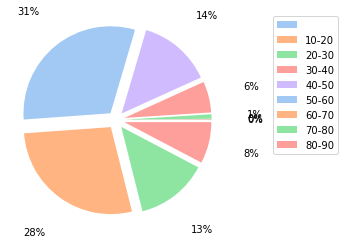

In [73]:
#define data
data = list(dataforchart[1])
labels = list(dataforchart['age_bins'])
explode = [0.1 for x in labels]


#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data,explode = explode,colors = colors, autopct='%.0f%%',pctdistance=1.5)
plt.legend(labels, bbox_to_anchor=(1.2, 1.0), loc='upper left')
plt.show()

#### ideas

we can use confidence intervals to say x percent of the patients are e.g. between this and this tall

In [140]:
def age_pie_chart(sickness):  
    # code to create loop for input of streamlit user input
    chartone = survival[[f'{sickness}','age_bins','patient_id']]
    an = chartone.pivot_table(index=[f'{sickness}'], values=['patient_id'], columns=['age_bins'], aggfunc='count')
    an.reset_index(inplace=True)

    dataforchart = an.loc[an[f'{sickness}']==1].transpose()
    dataforchart.reset_index(inplace=True)
    
    values = dataforchart[1].sum()
    dataforchart.loc[(dataforchart[1]/values < 0.05),'age_bins']='other'
    dataforchart = dataforchart.groupby(by='age_bins').agg({1:'sum'})
    dataforchart.reset_index(inplace=True)
    dataforchart.loc[(dataforchart[1]== np.nan), 1] = 0
    
    #define data
    data = list(dataforchart[1])
    labels = list(dataforchart['age_bins'])
    explode = [0.1 for x in labels]


    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:9]

    #create pie chart
    plt.pie(data,explode = explode, colors = colors, autopct='%.0f%%')
    plt.legend(labels, bbox_to_anchor=(1.2, 1.0), loc='upper left')
    return plt.show()

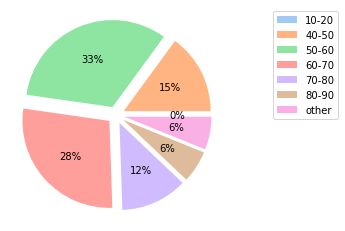

In [141]:
age_pie_chart('cirrhosis')

In [142]:
def weight_pie_chart(sickness):  
    # code to create loop for input of streamlit user input
    chartone = survival[[f'{sickness}','weight_bins','patient_id']]
    an = chartone.pivot_table(index=[f'{sickness}'], values=['patient_id'], columns=['weight_bins'], aggfunc='count')
    an.reset_index(inplace=True)

    dataforchart = an.loc[an[f'{sickness}']==1].transpose()
    dataforchart.reset_index(inplace=True)
    
    values = dataforchart[1].sum()
    dataforchart.loc[(dataforchart[1]/values < 0.05),'weight_bins']='other'
    dataforchart = dataforchart.groupby(by='weight_bins').agg({1:'sum'})
    dataforchart.reset_index(inplace=True)
    dataforchart.loc[(dataforchart[1]== np.nan), 1] = 0
    
    #define data
    data = list(dataforchart[1])
    labels = list(dataforchart['weight_bins'])
    explode = [0.1 for x in labels]


    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:9]

    #create pie chart
    plt.pie(data,explode = explode, colors = colors, autopct='%.0f%%')
    plt.legend(labels, bbox_to_anchor=(1.2, 1.0), loc='upper left')
    return plt.show()

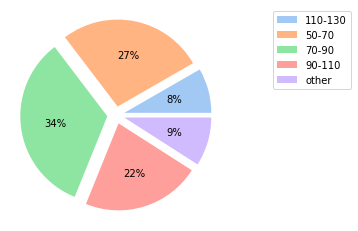

In [144]:
weight_pie_chart('cirrhosis')

In [145]:
def height_pie_chart(sickness):  
    # code to create loop for input of streamlit user input
    chartone = survival[[f'{sickness}','height_bins','patient_id']]
    an = chartone.pivot_table(index=[f'{sickness}'], values=['patient_id'], columns=['height_bins'], aggfunc='count')
    an.reset_index(inplace=True)

    dataforchart = an.loc[an[f'{sickness}']==1].transpose()
    dataforchart.reset_index(inplace=True)
    
    values = dataforchart[1].sum()
    dataforchart.loc[(dataforchart[1]/values < 0.05),'height_bins']='other'
    dataforchart = dataforchart.groupby(by='height_bins').agg({1:'sum'})
    dataforchart.reset_index(inplace=True)
    dataforchart.loc[(dataforchart[1]== np.nan), 1] = 0
    
    #define data
    data = list(dataforchart[1])
    labels = list(dataforchart['height_bins'])
    explode = [0.1 for x in labels]


    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:9]

    #create pie chart
    plt.pie(data,explode = explode, colors = colors, autopct='%.0f%%')
    plt.legend(labels, bbox_to_anchor=(1.2, 1.0), loc='upper left')
    return plt.show()

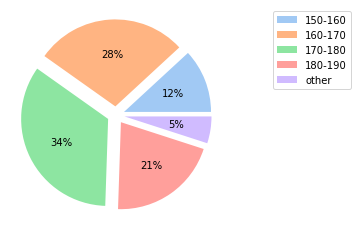

In [146]:
height_pie_chart('cirrhosis')

In [111]:
# tests


# code to create loop for input of streamlit user input
    sickness= 'cirrhosis'
    chartone = survival[[f'{sickness}','age_bins','patient_id']]
    an = chartone.pivot_table(index=[f'{sickness}'], values=['patient_id'], columns=['age_bins'], aggfunc='count')
    an.reset_index(inplace=True)

    dataforchart = an.loc[an[f'{sickness}']==1].transpose()
    dataforchart.reset_index(inplace=True)

    #define data
    data = list(dataforchart[1])
    labels = list(dataforchart['age_bins'])
    explode = [0.1 for x in labels]


    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:5]

    #create pie chart
    plt.pie(data,explode = explode, colors = colors, autopct='%.0f%%')
    plt.legend(labels, bbox_to_anchor=(1.2, 1.0), loc='upper left')
    plt.show()


ValueError: cannot convert float NaN to integer

posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

In [99]:
sickness = 'cirrhosis'

chartone = survival[[f'{sickness}','age_bins','patient_id']]
an = chartone.pivot_table(index=[f'{sickness}'], values=['patient_id'], columns=['age_bins'], aggfunc='count')
an.reset_index(inplace=True)

dataforchart = an.loc[an[f'{sickness}']==1].transpose()
dataforchart.reset_index(inplace=True)

values = dataforchart[1].sum()
dataforchart.loc[(dataforchart[1]/values < 0.05),'age_bins']='other'


In [106]:
data = list(dataforchart[1])
labels = list(dataforchart['age_bins'])
explode = [0.1 for x in labels]


    #define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

    #create pie chart
plt.pie(data,explode = explode, colors = colors, autopct='%.0f%%')
plt.legend(labels, bbox_to_anchor=(1.2, 1.0), loc='upper left')
plt.show()

ValueError: cannot convert float NaN to integer

posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

In [149]:
# further charts

from sklearn.preprocessing import LabelEncoder
survival['gender_encoded'] = LabelEncoder().fit_transform(survival.gender)

,patient_id,hospital_id,age,ethnicity,gender,height,icu_admit_source,weight,d1_heartrate_max,d1_heartrate_min,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death,age_bins,height_bins,weight_bins,gender_encoded
0,25312,118,68.0,Caucasian,M,180.3,Floor,73.9,119.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0,60-70,180-190,70-90,1
1,59342,81,77.0,Caucasian,F,160.0,Floor,70.2,118.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0,70-80,160-170,70-90,0
3,46918,118,81.0,Caucasian,F,165.1,Operating Room / Recovery,61.7,116.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0,80-90,160-170,50-70,0
5,74489,83,67.0,Caucasian,M,190.5,Accident & Emergency,100.0,113.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0,60-70,190-200,90-110,1
6,49526,83,59.0,Caucasian,F,165.1,Accident & Emergency,156.6,112.0,70.0,...,0.0,0.0,0.0,0.0,0.0,0,50-60,160-170,150-170,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91706,59223,121,54.0,Native American,M,177.8,Accident & Emergency,62.5,78.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0,50-60,170-180,50-70,1
91708,78108,30,75.0,Caucasian,M,177.8,Floor,72.9,115.0,70.0,...,0.0,0.0,0.0,0.0,1.0,0,70-80,170-180,70-90,1
91709,13486,121,56.0,Caucasian,F,183.0,Floor,158.0,100.0,76.0,...,0.0,0.0,0.0,0.0,0.0,0,50-60,180-190,150-170,0
91710,58179,195,48.0,Caucasian,M,170.2,Accident & Emergency,78.9,158.0,79.0,...,0.0,0.0,0.0,0.0,0.0,0,40-50,170-180,70-90,1


In [157]:
sickness= 'cirrhosis'

charttwo = survival[[f'{sickness}','patient_id','gender_encoded']]

an = charttwo.pivot_table(index=[f'{sickness}'], values=['patient_id'], columns=['gender_encoded'], aggfunc='count')
an.reset_index(inplace=True)

In [160]:
dataforchart = an[an[f'{sickness}']==1]

In [166]:
dataforchart.rename(columns={0:'female',1:'male'}, inplace=True)

C:\Users\leube\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [208]:
dataforchart
del dataforchart['cirrhosis']

In [212]:
dataforchart=dataforchart.transpose()

In [217]:
dataforchart.reset_index(inplace=True)

<AxesSubplot:xlabel='gender_encoded', ylabel='1'>

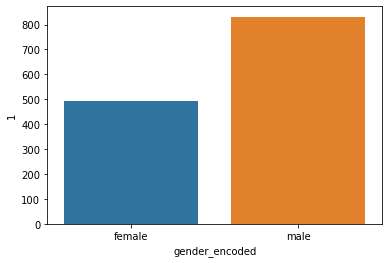

In [218]:
sns.barplot(x='gender_encoded', y=1, data=dataforchart)

In [221]:
# finished code and function 
def gender_sickness(sickness):
    
    charttwo = survival[[f'{sickness}','patient_id','gender_encoded']]

    an = charttwo.pivot_table(index=[f'{sickness}'], values=['patient_id'], columns=['gender_encoded'], aggfunc='count')
    an.reset_index(inplace=True)

    dataforchart = an[an[f'{sickness}']==1]
    dataforchart.rename(columns={0:'female',1:'male'}, inplace=True)
    dataforchart
    del dataforchart[f'{sickness}']
    dataforchart=dataforchart.transpose()
    dataforchart.reset_index(inplace=True)

    sns.barplot(x='gender_encoded', y=1, data=dataforchart)
    plt.legend()
    return plt.show()

C:\Users\leube\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
No handles with labels found to put in legend.


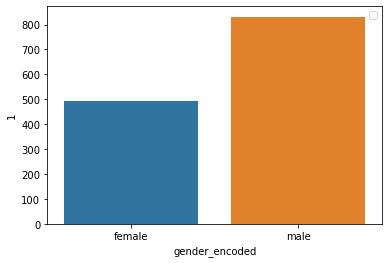

In [224]:
gender_sickness('cirrhosis')

In [222]:
def death_sickness(sickness):
    
    charttwo = survival[[f'{sickness}','patient_id','hospital_death']]

    an = charttwo.pivot_table(index=[f'{sickness}'], values=['patient_id'], columns=['hospital_death'], aggfunc='count')
    an.reset_index(inplace=True)

    dataforchart = an[an[f'{sickness}']==1]
    dataforchart.rename(columns={0:'alive',1:'dead'}, inplace=True)
    dataforchart
    del dataforchart[f'{sickness}']
    dataforchart=dataforchart.transpose()
    dataforchart.reset_index(inplace=True)

    sns.barplot(x='hospital_death', y=1, data=dataforchart)
    plt.legend()
    return plt.show()

C:\Users\leube\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
No handles with labels found to put in legend.


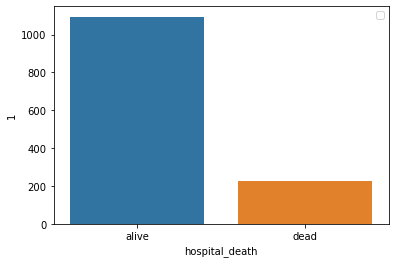

In [225]:
death_sickness('cirrhosis')

In [ ]:
def stats_sickness(sickness):
    